In [1]:
import numpy as np
from qze.dimer_gutz_mc import DimerGutzMCParameters
from pickle import load
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
PLT_DIR_TMP = 'plots/dimer/tmp/'
PLT_DIR = 'plots/dimer/'

In [3]:
# Number of simulations with the same parameters.
Nsim = 4

# Simulation parameters.
# nwalk = int(2.5*10**7)
nwalk = 10**3
T = 20
dt = .01
lambdas = [[.25, .25],
           [.25, 1.75],
           [1.25, .25]]
omega_S = 1
walk_pos0 = np.array(nwalk * [[np.pi, np.pi]])
# walk_pos0 = None


# sim_list = [DimerGutzMCParameters(omega_S,
#                                   lmbd_1,
#                                   lmbd_2,
#                                   walk_pos0,
#                                   dt,
#                                   T,
#                                   nwalk,
#                                   simid)
#             for (lmbd_1, lmbd_2) in lambdas
#             for simid in range(Nsim)]

In [4]:
bins = 72
binning_range = [[-np.pi, np.pi], [-np.pi, np.pi]]
hist_gutz = []

for (lmbd_1, lmbd_2) in lambdas:
    walk_pos = []
    for simid in range(Nsim):
        sim = DimerGutzMCParameters(omega_S,
                                    lmbd_1,
                                    lmbd_2,
                                    walk_pos0,
                                    dt,
                                    T,
                                    nwalk,
                                    simid)
        # f = open(f"data/{str(sim)}.pkl", "rb")
        # data = load(f)
        # f.close()
        # walk_pos.append(data[1])
        f = open(f"data/{str(sim)}.npz", "rb")
        data = np.load(f)
        walk_pos.append(data['walk_pos'])

    walk_pos = np.array(walk_pos)
    walk_pos = np.concatenate(walk_pos, axis=0)    

    h, edges_l, edges_r = np.histogram2d(walk_pos[:, 0],
                                         walk_pos[:, 1],
                                         bins=bins,
                                         range=binning_range,
                                         density=True)
    
    hist_gutz.append(h)

# for sim in sim_list:
#     walk_pos = []
#     for id in range(4):
#         f = open(f"data/{str(sim)}-simid={id}.pkl", "rb")
#         data = load(f)
#         f.close()
#         walk_pos.append(data[1])

#     walk_pos = np.array(walk_pos)
#     walk_pos = np.concatenate(walk_pos, axis=0)    

#     h, edges_l, edges_r = np.histogram2d(walk_pos[:, 0],
#                                          walk_pos[:, 1],
#                                          bins=bins,
#                                          range=binning_range,
#                                          density=True)
    
#     hist_gutz.append(h)

In [5]:
# stage2_data = []
# for id in range(4):
#     f = open(f"data/dimer-solver=gutzwiller-mc-omega_S=1.00-lmbd_1=0.25-lmbd_2=1.75-dt=0.01-T=20-nwalk=25000000-simid={id}.pkl", "rb")
#     data = load(f)
#     f.close()
#     stage2_data.append(data[1])

# stage2_walk_position = np.array(stage2_data)
# stage2_walk_position = np.concatenate(stage2_walk_position, axis=0)
# walk_positions[1] = stage2_walk_position

In [6]:
# lambdas = [[.25, .25], [.25, 1.75], [1.25, .25]]

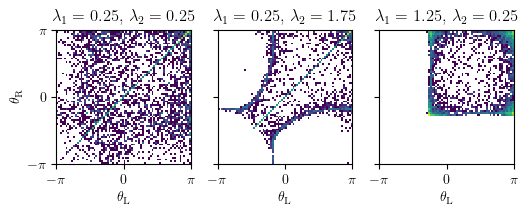

In [7]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_grid_1x3.mplstyle"])

bins = 72
binning_range = [[-np.pi, np.pi], [-np.pi, np.pi]]
ticks = np.linspace(-np.pi, np.pi, 3)
tick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

fig, axs = plt.subplots(1, 3)
for i, (lmbd_1, lmbd_2) in enumerate(lambdas):
    axs[i].pcolormesh(edges_l, edges_r, hist_gutz[i],
                      norm='log')

    # centers_l = (edges_l[:-1] + edges_l[1:]) / 2
    # centers_r = (edges_r[:-1] + edges_r[1:]) / 2
    # axs[i].pcolormesh(centers_l, centers_r, hist_gutz[i],
    #                   norm='log',
    #                   shading='gouraud')
    
    # axs[i].hist2d(walk_positions[i][:, 0], walk_positions[i][:, 1],
    #               density=True,
    #               range=binning_range,
    #               bins=bins,
    #               norm="log")
    axs[i].set_xticks(ticks)
    axs[i].set_xticklabels(tick_labels)
    axs[i].set_yticks(ticks)
    axs[i].set_yticklabels(tick_labels)
    axs[i].set_title(rf"$\lambda_1 = {lmbd_1}$, $\lambda_2 = {lmbd_2}$")
    axs[i].set(xlabel=r"$\theta_\mathrm{L}$", ylabel=r"$\theta_\mathrm{R}$")
    axs[i].set(aspect='equal')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# plt.savefig(f'{PLT_DIR}dimer-gutz-p-infty-mc.pdf')

## Polar coordinates

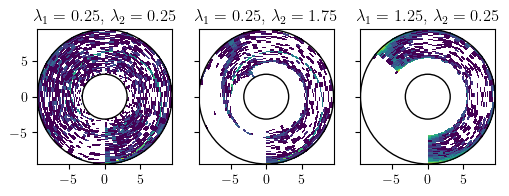

In [8]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_grid_1x3.mplstyle"])

bins = 72
binning_range = [[-np.pi, np.pi], [-np.pi, np.pi]]
ticks = np.linspace(-np.pi, np.pi, 3)
tick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

fig, axs = plt.subplots(1, 3)
for i, (lmbd_1, lmbd_2) in enumerate(lambdas):
    R = np.pi + edges_r + np.pi
    T = edges_l

    X = np.outer(R, np.sin(T))
    Y = np.outer(R, np.cos(T))

    axs[i].pcolormesh(X, Y, hist_gutz[i],
                      norm="log",
                      vmin=hist_gutz[i][np.nonzero(hist_gutz[i])].min(),
                      vmax=hist_gutz[i].max())
    
    c = plt.Circle( (0, 0) , np.pi , fill=False)
    axs[i].add_patch(c)
    C = plt.Circle( (0, 0) , 3*np.pi , fill=False)
    axs[i].add_patch(C)

    # centers_l = (edges_l[1:] + edges_l[:-1]) / 2
    # centers_r = (edges_r[1:] + edges_r[:-1]) / 2   
    # axs[i].pcolormesh(centers_l, centers_r, hist_comp,
    #                   norm="log",
    #                   vmin=hist_gutz[np.nonzero(hist_gutz)].min(),
    #                   vmax=hist_gutz.max(),
    #                   shading='gouraud')

    # axs[i].set_xticks(ticks)
    # axs[i].set_xticklabels(tick_labels)
    # axs[i].set_yticks(ticks)
    # axs[i].set_yticklabels(tick_labels)
    axs[i].set_title(rf"$\lambda_1 = {lmbd_1}$, $\lambda_2 = {lmbd_2}$")
    # axs[i].set(xlabel=r"$\theta_\mathrm{L}$", ylabel=r"$\theta_\mathrm{R}$")
    axs[i].set(aspect='equal')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# plt.savefig(f'{PLT_DIR_TMP}polar.pdf')

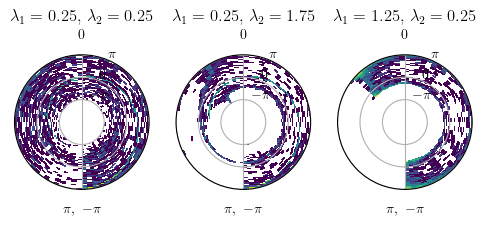

In [9]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_grid_1x3.mplstyle"])

bins = 72
binning_range = [[-np.pi, np.pi], [-np.pi, np.pi]]
# ticks_ang = np.linspace(-np.pi, np.pi, 3)
ticks_ang = np.linspace(0, np.pi, 2)
ticks_rad = [np.pi, 2*np.pi, 3*np.pi]
tick_lab_ang = [r"$0$", r"$\pi, ~-\pi$"]
tick_lab_rad = [r"$-\pi$", r"$0$", r"$\pi$"]


fig = plt.figure()
for i, (lmbd_1, lmbd_2) in enumerate(lambdas):
    ax = fig.add_subplot(1, 3, i+1, projection='polar')
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    # ax.grid(False)
    ax.set_xticks(ticks_ang)
    ax.set_yticks(ticks_rad)
    ax.set_xticklabels(tick_lab_ang)
    ax.set_yticklabels(tick_lab_rad)
    ax.set_xlim(-np.pi, np.pi)
    ax.set_ylim(0, 3*np.pi)
    # ax.set(xlabel=r"$\theta_\mathrm{L}$", ylabel=r"$\theta_\mathrm{R}$")

    

    R = 2*np.pi + edges_r
    T = edges_l

    X = np.outer(R, np.sin(T))
    Y = np.outer(R, np.cos(T))
    
    ax.pcolormesh(T, R, hist_gutz[i],
                   norm="log",
                   vmin=hist_gutz[i][np.nonzero(hist_gutz[i])].min(),
                   vmax=hist_gutz[i].max())
    
    # c = plt.Circle( (0, 0) , np.pi , fill=False)
    # ax.add_patch(c)
    # C = plt.Circle( (0, 0) , 3*np.pi , fill=False)
    # ax.add_patch(C)

    # centers_l = (edges_l[1:] + edges_l[:-1]) / 2
    # centers_r = (edges_r[1:] + edges_r[:-1]) / 2   
    # axs[i].pcolormesh(centers_l, centers_r, hist_comp,
    #                   norm="log",
    #                   vmin=hist_gutz[np.nonzero(hist_gutz)].min(),
    #                   vmax=hist_gutz.max(),
    #                   shading='gouraud')

    # axs[i].set_xticks(ticks)
    # axs[i].set_xticklabels(tick_labels)
    # axs[i].set_yticks(ticks)
    # axs[i].set_yticklabels(tick_labels)
    ax.set_title(rf"$\lambda_1 = {lmbd_1}$, $\lambda_2 = {lmbd_2}$")
    # axs[i].set(xlabel=r"$\theta_\mathrm{L}$", ylabel=r"$\theta_\mathrm{R}$")
    ax.set(aspect='equal')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

plt.savefig(f'{PLT_DIR_TMP}polar.pdf')

## Torus

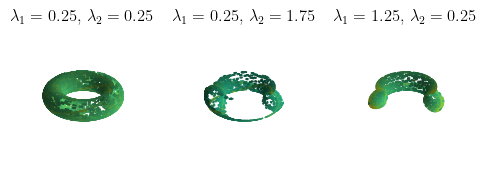

In [10]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_grid_1x3.mplstyle"])

bins = 72
binning_range = [[-np.pi, np.pi], [-np.pi, np.pi]]

# Parameters for the torus
R = 3  # Distance from the center of the tube to the center of the torus
r = 1  # Radius of the tube

# Create a grid of angles
theta = np.linspace(-np.pi, np.pi, bins)
phi = np.linspace(-np.pi, np.pi, bins)
# theta = np.linspace(0, 2*np.pi, bins)
# phi = np.linspace(0, 2*np.pi, bins)

theta, phi = np.meshgrid(theta, phi)

# Parametric equations for the torus
# X = (R + r * np.cos(theta)) * np.cos(phi)
# Y = (R + r * np.cos(theta)) * np.sin(phi)
# Z = r * np.sin(theta)

# X = (R + r * np.sin(theta+np.pi/2)) * np.cos(np.pi-phi)
# Y = (R + r * np.sin(theta+np.pi/2)) * np.sin(np.pi-phi)
# Z = r * np.cos(theta+np.pi/2)

X = (R + r * np.sin(np.pi+theta)) * np.cos(np.pi-phi)
Y = (R + r * np.sin(np.pi+theta)) * np.sin(np.pi-phi)
Z = r * np.cos(np.pi+theta)


Xw = (R + r*.99 * np.sin(np.pi+theta)) * np.cos(np.pi-phi)
Yw = (R + r*.99 * np.sin(np.pi+theta)) * np.sin(np.pi-phi)
Zw = r*.99 * np.cos(np.pi+theta)

fig = plt.figure()
# fig.tight_layout()
for i, (lmbd_1, lmbd_2) in enumerate(lambdas):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')



    # ax.plot_wireframe(Xw, Yw, Zw,
    #                   rstride=4, cstride=8,
    #                   lw=.5,
    #                   zorder=2)



    # F = np.log(hist_gutz)
    F = hist_gutz[i]

    # Surface plot with color mapping based on F
    norm = mpl.colors.LogNorm(vmin=1/(10*nwalk)/(2*np.pi)**2)
    F = norm(F)
    cmap = plt.get_cmap('viridis')
    cmap.set_under('w')
    facecolors = cmap(F)
    torus = ax.plot_surface(X, Y, Z, facecolors=facecolors,
                            rstride=1,
                            cstride=1,
                            zorder=1)#,
                            
                            # rstride=5,
                            # cstride=5,
                            # antialiased=True)

    

    # Create a ScalarMappable and set the colormap to match the surface plot
    # mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
    # mappable.set_array(F)
    # plt.colorbar(mappable, ax=ax)  # Attach the colorbar to the current axes

    # Set the aspect ratio to ensure equal scaling on all axes
    ax.set_box_aspect([1, 1, 1])  # Aspect ratio is 1:1:1

    # Adjust the limits to be the same for all axes
    max_range = np.array([X.max() - X.min(), Y.max() - Y.min(), Z.max() - Z.min()]).max() / 2.0

    mean_x = X.mean()
    mean_y = Y.mean()
    mean_z = Z.mean()

    ax.set_xlim(mean_x - max_range, mean_x + max_range)
    ax.set_ylim(mean_y - max_range, mean_y + max_range)
    ax.set_zlim(mean_z - max_range, mean_z + max_range)

    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')
    # ax.set_zlabel('Z')

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

    ax.set_title(rf"$\lambda_1 = {lmbd_1}$, $\lambda_2 = {lmbd_2}$")

    ax.grid(False)
    ax.axis('off')

    # ax.azim = ax.azim

# plt.tight_layout()
plt.savefig(f'{PLT_DIR_TMP}torus.pdf')

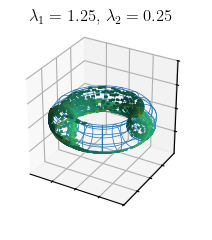

In [11]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_fullwidth.mplstyle"])

# Parameters for the torus
R = 3  # Distance from the center of the tube to the center of the torus
r = 1  # Radius of the tube

# Create a grid of angles
theta = np.linspace(-np.pi, np.pi, bins)
phi = np.linspace(-np.pi, np.pi, bins)
# theta = np.linspace(0, 2*np.pi, bins)
# phi = np.linspace(0, 2*np.pi, bins)

theta, phi = np.meshgrid(theta, phi)

X = (R + r * np.sin(np.pi+theta)) * np.cos(np.pi-phi)
Y = (R + r * np.sin(np.pi+theta)) * np.sin(np.pi-phi)
Z = r * np.cos(np.pi+theta)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')


ax.plot_wireframe(Xw, Yw, Zw,
                  rstride=4, cstride=8,
                  lw=.5,
                  zorder=2)


# F = np.log(hist_gutz)
F = hist_gutz[1]

# Surface plot with color mapping based on F
norm = mpl.colors.LogNorm(vmin=1/(10*nwalk)/(2*np.pi)**2)
F = norm(F)
cmap = plt.get_cmap('viridis')
cmap.set_under('w')
facecolors = cmap(F)
torus = ax.plot_surface(X, Y, Z, facecolors=facecolors,
                        rstride=1,
                        cstride=1,
                        zorder=1,
                        antialiased=True)


# Create a ScalarMappable and set the colormap to match the surface plot
# mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
# mappable.set_array(F)
# plt.colorbar(mappable, ax=ax)  # Attach the colorbar to the current axes

# Set the aspect ratio to ensure equal scaling on all axes
ax.set_box_aspect([1, 1, 1])  # Aspect ratio is 1:1:1

# Adjust the limits to be the same for all axes
max_range = np.array([X.max() - X.min(), Y.max() - Y.min(), Z.max() - Z.min()]).max() / 2.0

mean_x = X.mean()
mean_y = Y.mean()
mean_z = Z.mean()

ax.set_xlim(mean_x - max_range, mean_x + max_range)
ax.set_ylim(mean_y - max_range, mean_y + max_range)
ax.set_zlim(mean_z - max_range, mean_z + max_range)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax.set_title(rf"$\lambda_1 = {lambdas[i][0]}$, $\lambda_2 = {lambdas[i][1]}$")

ax.azim = ax.azim

# plt.tight_layout()
plt.savefig(f'{PLT_DIR_TMP}torus_single.pdf')

In [12]:
# from mayavi import mlab


# # Parameters for the torus
# R = 3  # Distance from the center of the tube to the center of the torus
# r = 1  # Radius of the tube

# # Create a grid of angles
# theta = np.linspace(-np.pi, np.pi, bins)
# phi = np.linspace(-np.pi, np.pi, bins)
# # theta = np.linspace(0, 2*np.pi, bins)
# # phi = np.linspace(0, 2*np.pi, bins)

# theta, phi = np.meshgrid(theta, phi)

# X = (R + r * np.sin(np.pi+theta)) * np.cos(np.pi-phi)
# Y = (R + r * np.sin(np.pi+theta)) * np.sin(np.pi-phi)
# Z = r * np.cos(np.pi+theta)


# s = mlab.mesh(X, Y, Z)
# # mlab.show()